In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# lidar characteristic
# http://velodynelidar.com/docs/datasheet/63-9194_Rev-F_HDL-64E_S3_Data%20Sheet_Web.pdf
def cylindrical_projection(lidar, 
                           ver_fov = (-24.9, 2.), 
                           hor_fov = (-180, 180), 
                           v_res = 0.42,
                           h_res = 0.35,
                           d_max = None):
    '''
    lidar: a numpy array of shape N*D, D>=3
    ver_fov : angle range of vertical projection in degree
    hor_fov: angle range of horizantal projection in degree
    v_res : vertical resolusion
    h_res : horizontal resolution
    d_max : maximun range distance
    
    return : cylindrical projection (or panorama view) of lidar
    '''
    
    x = lidar[:,0]
    y = lidar[:,1]
    z = lidar[:,2]
    d = np.sqrt(np.square(x)+np.square(y))
    
    if d_max != None:
        d[d>d_max] = d_max
    
    
    theta = np.arctan2(y, x)
    phi = -np.arctan2(z, d)
    
    x_view = np.int16(np.ceil((theta*180/np.pi - hor_fov[0])/h_res))
    y_view = np.int16(np.ceil((phi*180/np.pi + ver_fov[1])/v_res))
    
    x_max = int(np.ceil((hor_fov[1] - hor_fov[0])/h_res))
    y_max = int(np.ceil((ver_fov[1] - ver_fov[0])/v_res))
    
    
    indices = np.logical_and( np.logical_and(x_view >= 0, x_view <= x_max), 
                           np.logical_and(y_view >= 0, y_view <= y_max)  )
    
    x_view = x_view[indices]
    y_view = y_view[indices]
    z = z[indices]
    d = d[indices]
    d_z = [[d[i],z[i]] for i in range(len(d))]
    
    width_view = int(np.ceil((hor_fov[1] - hor_fov[0])/h_res)) 
    height_view = int(np.ceil((ver_fov[1] - ver_fov[0])/v_res))
    
    view = np.zeros([height_view+1, width_view+1, 2],dtype=np.float64)
    view[y_view,x_view] = d_z
    return view

(66, 1030, 2)


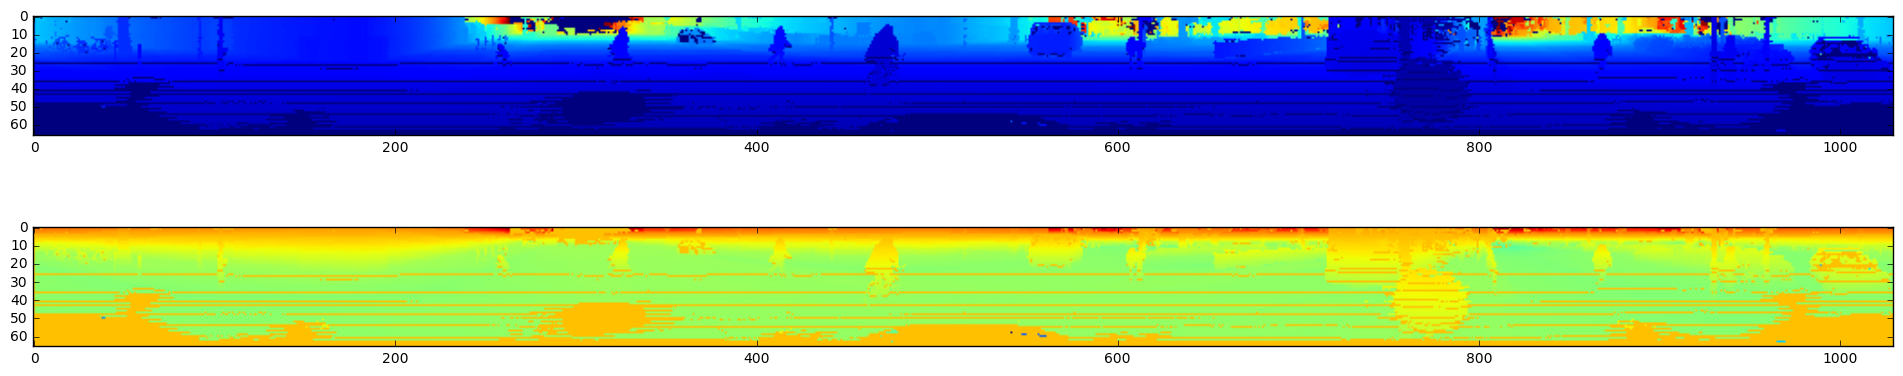

In [3]:
lidar = np.load('../Didi_challenge/Code_sample/didi-udacity-2017/data/one_frame/lidar.npy')
view = cylindrical_projection(lidar, 
                           ver_fov = (-24.9, 2.), 
                           hor_fov = (-180,180), 
                           v_res = 0.42,
                           h_res = 0.35,
                           d_max = 100)
print(view.shape)
fig, ax = plt.subplots(2,1, figsize = (24,5))
ax[0].imshow(view[:,:,0])
ax[1].imshow(view[:,:,1])
